In [419]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [420]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [421]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [422]:
df.shape

(7043, 21)

In [423]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [425]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [426]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [427]:
df = df.drop(columns=['customerID'])

In [428]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

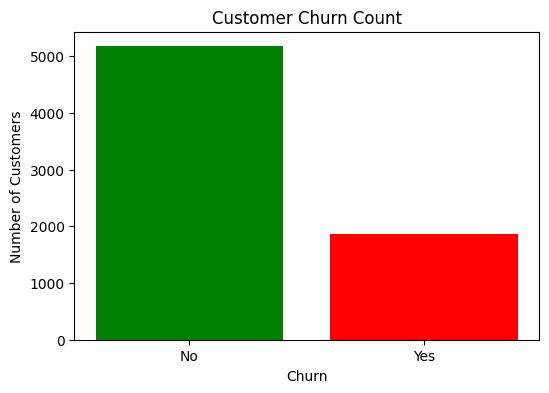

In [429]:
churn_counts = df['Churn'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(churn_counts.index, churn_counts.values, color=['green', 'red'])
plt.title('Customer Churn Count')
plt.xlabel('Churn')
plt.ylabel('Number of Customers')
plt.show()

## Churn by Gender

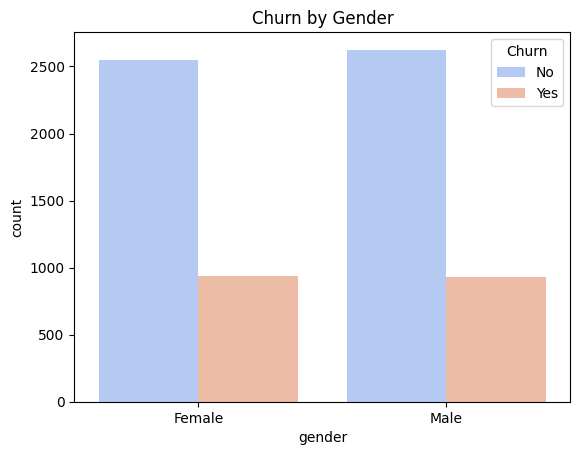

In [430]:
sns.countplot(x='gender', hue='Churn', data=df, palette='coolwarm')
plt.title('Churn by Gender')
plt.show()


## 

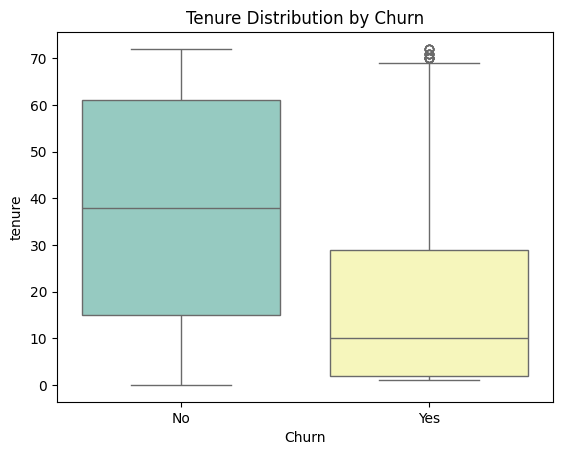

In [431]:
sns.boxplot(x='Churn', y='tenure', data=df, palette='Set3')
plt.title('Tenure Distribution by Churn')
plt.show()


TotalCharges column from object to float
errors='coerce' will convert any problematic (non-numeric or empty) values to NaN instead of throwing an error.
After this, you can check for any resulting NaNs with:

## Internet Service vs Churn

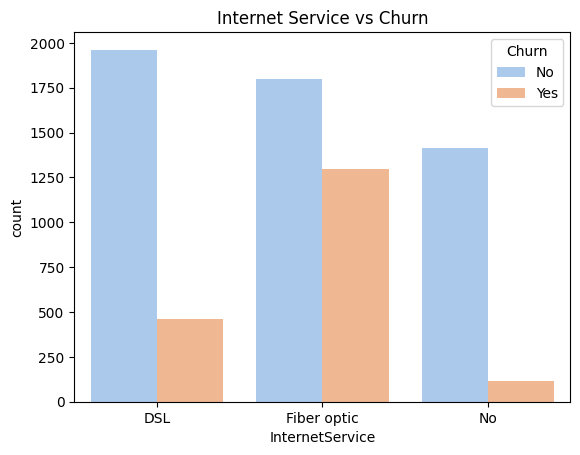

In [432]:
sns.countplot(x='InternetService', hue='Churn', data=df, palette='pastel')
plt.title('Internet Service vs Churn')
plt.show()


## Monthly Charges Distribution

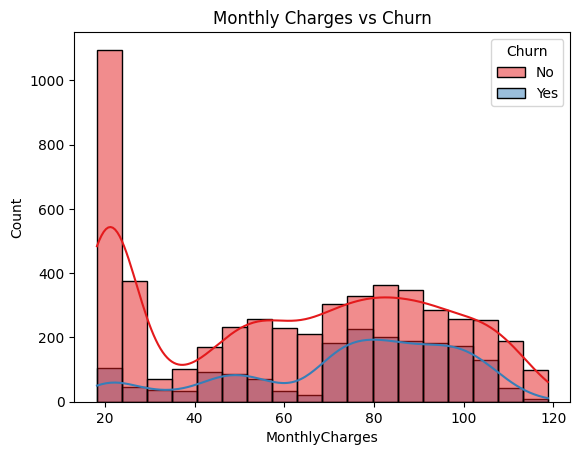

In [433]:
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, palette='Set1')
plt.title('Monthly Charges vs Churn')
plt.show()


In [434]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


## Heatmap for Correlation (for numerical features only)

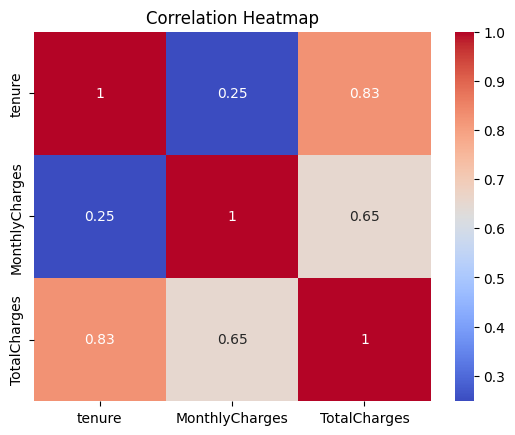

In [435]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
corr = df[numerical_cols].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [436]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [437]:
df = df.dropna(subset=['TotalCharges'])
#drop rows where the TotalCharges column has NaN values, use

In [438]:
df['tenure'].value_counts().unique()

array([613, 362, 238, 200, 176, 170, 133, 131, 123, 119, 117, 116, 110,
       109, 100,  99,  98,  97,  95,  94,  90,  89,  88,  87,  85,  80,
        79,  76,  74,  73,  72,  71,  70,  69,  68,  67,  66,  65,  64,
        63,  61,  60,  59,  57,  56,  51,  50])

In [439]:
df['tenure'].max()

np.int64(72)

In [440]:
# Create a new column 'TenureGroup'
bins = [0, 12, 24, 36, 48, 60, 72]
labels = ['0-1 year', '1-2 years', '2-3 years', '3-4 years', '4-5 years', '5-6 years']

df['TenureGroup'] = pd.cut(df['tenure'], bins=bins, labels=labels, right=True)

# Group by TenureGroup and count customers
tenure_counts = df['TenureGroup'].value_counts().sort_index()

print(tenure_counts)
df = df.drop('tenure', axis=1)


TenureGroup
0-1 year     2175
1-2 years    1024
2-3 years     832
3-4 years     762
4-5 years     832
5-6 years    1407
Name: count, dtype: int64


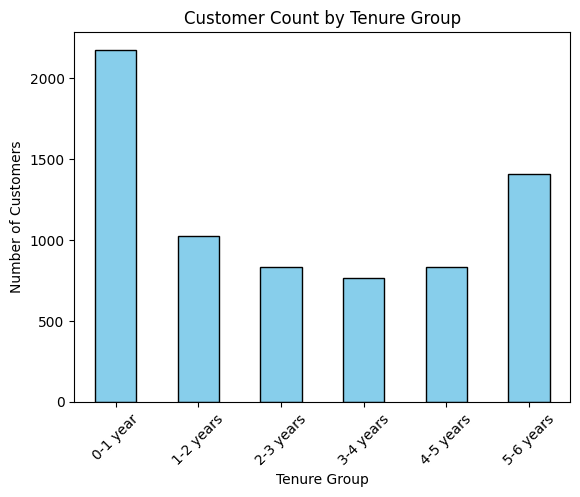

In [441]:
import matplotlib.pyplot as plt

tenure_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Customer Count by Tenure Group')
plt.xlabel('Tenure Group')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


In [442]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
from imblearn.pipeline import Pipeline as ImbPipeline
warnings.filterwarnings('ignore')
from imblearn.combine import SMOTEENN

In [443]:
df.shape

(7032, 20)

In [444]:
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0-1 year
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,2-3 years
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0-1 year
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,3-4 years
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0-1 year
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,0-1 year
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No,1-2 years
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No,0-1 year
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,2-3 years
9,Male,0,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No,5-6 years


In [445]:
columns_to_check = [
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod', 'TenureGroup'
]

for col in columns_to_check:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print('-' * 50)


Unique values in 'MultipleLines':
['No phone service' 'No' 'Yes']
--------------------------------------------------
Unique values in 'InternetService':
['DSL' 'Fiber optic' 'No']
--------------------------------------------------
Unique values in 'OnlineSecurity':
['No' 'Yes' 'No internet service']
--------------------------------------------------
Unique values in 'OnlineBackup':
['Yes' 'No' 'No internet service']
--------------------------------------------------
Unique values in 'DeviceProtection':
['No' 'Yes' 'No internet service']
--------------------------------------------------
Unique values in 'TechSupport':
['No' 'Yes' 'No internet service']
--------------------------------------------------
Unique values in 'StreamingTV':
['No' 'Yes' 'No internet service']
--------------------------------------------------
Unique values in 'StreamingMovies':
['No' 'Yes' 'No internet service']
--------------------------------------------------
Unique values in 'Contract':
['Month-to-month' '

In [446]:
# Replace binary variables
binary_features = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
df[binary_features] = df[binary_features].replace({'Yes': 1, 'No': 0})
df['gender'] = df['gender'].replace({'Female': 0, 'Male': 1})

# Encode target
df['Churn'] = df['Churn'].replace({'Yes': 1, 'No': 0})

In [447]:
# 2. One-hot encode categorical features
categorical_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
                        'Contract', 'PaymentMethod', 'TenureGroup']
df = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [448]:
# Standardize numerical features
numeric_features = ['MonthlyCharges', 'TotalCharges']
scaler = StandardScaler()
df[numeric_features] = scaler.fit_transform(df[numeric_features])


In [449]:
X = df.drop('Churn', axis=1)
y = df['Churn']


Handling class imbalance using the SMOTE (Synthetic Minority Over-sampling Technique) + Edited Nearest Neighbors (SMOTEENN) technique, which is a combination of two methods used to balance class distributions in imbalanced datasets.

Breakdown of the code:
SMOTE (Synthetic Minority Over-sampling Technique): This is a technique used to generate synthetic samples for the minority class (the class with fewer instances) by interpolating between existing minority class samples. The idea is to generate new, synthetic examples that help the model to learn the patterns of the minority class more effectively, thereby improving performance in imbalanced datasets.

Edited Nearest Neighbors (ENN): After applying SMOTE to generate synthetic samples, Edited Nearest Neighbors is applied to clean up the synthetic data. ENN works by removing noisy, mislabeled examples that may have been introduced during the SMOTE process or are simply outliers.

 What is the SMOTEENN?
 SMOTEENN is a combination of both SMOTE and ENN:

 SMOTE: Upsamples the minority class by creating synthetic samples.

 ENN: Cleans up the newly created synthetic samples by removing noisy ones.

This combined method is helpful when you're dealing with imbalanced data and want to both increase the minority class and clean the resulting data.

In [450]:
# Initialize SMOTEENN
sm = SMOTEENN(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)


In [451]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)


In [452]:
# Train RandomForest
model1 = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model1.fit(X_train, y_train)

# Predict and evaluate
y_pred = model1.predict(X_test)
y_proba = model1.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy : 0.9580745341614907
F1-score : 0.963855421686747
ROC AUC  : 0.9924813792320768

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       547
           1       0.96      0.97      0.96       741

    accuracy                           0.96      1288
   macro avg       0.96      0.96      0.96      1288
weighted avg       0.96      0.96      0.96      1288



In [453]:
model2 = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)

print(classification_report(y_test, y_pred))
y_pred = model2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       547
           1       0.95      0.97      0.96       741

    accuracy                           0.96      1288
   macro avg       0.96      0.95      0.95      1288
weighted avg       0.96      0.96      0.96      1288

Accuracy: 0.9557453416149069


In [454]:
print("Original class distribution:")
print(y.value_counts())

print("After SMOTEENN:")
print(pd.Series(y_resampled).value_counts())


Original class distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64
After SMOTEENN:
Churn
1    3702
0    2735
Name: count, dtype: int64


In [455]:
# Train Decision Tree model
model3 = DecisionTreeClassifier(random_state=42)
model3.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model3.predict(X_test)
y_proba = model3.predict_proba(X_test)[:, 1]

print("Accuracy :", accuracy_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))
print("ROC AUC  :", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy : 0.9270186335403726
F1-score : 0.9365721997300944
ROC AUC  : 0.9253244910899102

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91       547
           1       0.94      0.94      0.94       741

    accuracy                           0.93      1288
   macro avg       0.93      0.93      0.93      1288
weighted avg       0.93      0.93      0.93      1288



## Doing samething with pipeline and column transformer

In [456]:
# # Target variable
# y = df['Churn'].replace({'Yes': 1, 'No': 0})
# X = df.drop(['Churn'], axis=1)

# # Define column categories
# binary_features = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
# gender_feature = ['gender']
# numeric_features = ['MonthlyCharges', 'TotalCharges']
# categorical_features = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
#                         'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
#                         'Contract', 'PaymentMethod', 'TenureGroup']

# # Binary mapping function
# def map_binary(X):
#     return X.replace({'Yes': 1, 'No': 0})

# # Gender mapping function
# def map_gender(X):
#     return X.replace({'Female': 0, 'Male': 1})

# # Pipelines for preprocessing
# binary_transformer = Pipeline(steps=[
#     ('map_binary', FunctionTransformer(map_binary))
# ])

# gender_transformer = Pipeline(steps=[
#     ('map_gender', FunctionTransformer(map_gender))
# ])

# numeric_transformer = Pipeline(steps=[
#     ('scaler', StandardScaler())
# ])

# categorical_transformer = Pipeline(steps=[
#     ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False))
# ])

# # Combine all into ColumnTransformer
# preprocessor = ColumnTransformer(transformers=[
#     ('bin', binary_transformer, binary_features),
#     ('gen', gender_transformer, gender_feature),
#     ('num', numeric_transformer, numeric_features),
#     ('cat', categorical_transformer, categorical_features)
# ])

# # Create full pipeline with SMOTEENN
# pipeline = ImbPipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('smoteenn', SMOTEENN(random_state=42)),
#     ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
# ])

# # Split original data (before SMOTEENN)
# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, stratify=y, random_state=42
# )

# # Fit the pipeline
# pipeline.fit(X_train, y_train)

# # Predict and evaluate
# y_pred = pipeline.predict(X_test)
# y_proba = pipeline.predict_proba(X_test)[:, 1]

# print("Accuracy :", accuracy_score(y_test, y_pred))
# print("F1-score :", f1_score(y_test, y_pred))
# print("ROC AUC  :", roc_auc_score(y_test, y_proba))
# print("\nClassification Report:\n", classification_report(y_test, y_pred))

In [457]:
import pickle

In [458]:
file = 'customer_churn.sav'

In [459]:
pickle.dump(model1, open(file, 'wb'))

In [460]:
load_model = pickle.load(open(file,'rb'))

In [461]:
load_model.score(X_test, y_test)

0.9580745341614907